# Framework:
1. Data collection and their preliminary preprocessing

2. EDA

3. Data Preprocessing

4. Model building and Modeling

5. Model evaluation and Interpretation

## EDA

### Requirement libraries and initial setting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px   #for GeoMap
import missingno as msno
from sklearn.preprocessing import RobustScaler
from scipy import stats

In [2]:
# resize to display
pd.options.display.max_rows = 200
print(pd.options.display.max_rows)
pd.options.display.max_columns = 200
print(pd.options.display.max_columns)

plt.rcParams.update({'font.size': 22})
sns.set_style("whitegrid")

200
200


In [3]:
NIdf = pd.read_csv('pre-data.csv')
NIdf1 = NIdf.iloc[:,4:49]
NIdf1

Country  Total.Vaccinations  MS.Prevalence  \
0                   Algeria                30.0           35.0   
1                    Angola                 NaN            NaN   
2                     Benin                 NaN            NaN   
3                  Botswana                 NaN            NaN   
4              Burkina Faso                 NaN            NaN   
5                   Burundi                 NaN            NaN   
6                  Cameroon               400.0            0.0   
7                Cape Verde                 NaN            NaN   
8                      Chad                 NaN            NaN   
9                  Djibouti                 NaN            1.0   
10                    Egypt            250171.0           59.0   
11                  Eritrea                 NaN            NaN   
12                 Ethiopia            794473.0            0.0   
13                    Gabon                 NaN            NaN   
14                   Gambia                 NaN            NaN   
15                    Ghana            120680.0            1.0   
16                   Guinea            106686.0            NaN   
17                    Kenya            109911.0            0.0   
18                  Lesotho                 NaN            NaN   
19                  Liberia                 NaN            NaN   
20                    Libya                 NaN           15.0   
21               Madagascar                 NaN            NaN   
22                   Malawi            193006.0            NaN   
23                     Mali                 NaN            NaN   
24               Mauritania                 NaN            NaN   
25                Mauritius                 NaN            NaN   
26                  Morocco          10962534.0           20.0   
27               Mozambique                 NaN            NaN   
28                  Namibia             60509.0            2.0   
29                    Niger                 NaN            0.0   
30                  Nigeria           1110632.0            1.0   
31                   Rwanda            274277.0            NaN   
32                  Senegal            334225.0            NaN   
33               Seychelles             41548.0            NaN   
34             Sierra Leone              7981.0            NaN   
35                  Somalia               377.0            NaN   
36                    Sudan             20715.0            0.0   
37                     Togo                 NaN            NaN   
38                  Tunisia            870132.0           20.0   
39                   Uganda            483474.0            NaN   
40                   Zambia             70669.0            0.0   
41                 Zimbabwe           1047190.0            NaN   
42              Afghanistan              2859.0            NaN   
43               Azerbaijan           1592433.0            NaN   
44                  Bahrain           1356951.0            NaN   
45               Bangladesh           4081326.0            NaN   
46                   Bhutan            482131.0            NaN   
47                   Brunei             39593.0            NaN   
48                 Cambodia           4601148.0            NaN   
49                    China         664023000.0            3.0   
50                  Georgia            152101.0           30.0   
51                Hong Kong           2547277.0            1.0   
52                    India         211240282.0           11.0   
53                Indonesia          16174679.0            0.0   
54                     Iran            204060.0           90.0   
55                     Iraq              9985.0           12.0   
56                   Israel          10591773.0          151.0   
57                    Japan          11565589.0            4.0   
58                   Jordan            154235.0            NaN   
59               Kazakhstan           1483693.0            N

### Non Graphical (Summary):

In [4]:
cross = pd.crosstab(index = NIdf['Continent'], columns = 'count')
display(np.unique(NIdf['Continent']).shape)

display(cross)
# find proportions 
display(cross/cross.sum())
Tab = pd.crosstab(index = NIdf['Country'], columns = NIdf['Continent'])

display(Tab)

(6,)

col_0          count
Continent           
Africa            42
Asia              41
Europe            39
North America     17
Oceania            4
South America     12

col_0             count
Continent              
Africa         0.270968
Asia           0.264516
Europe         0.251613
North America  0.109677
Oceania        0.025806
South America  0.077419

Continent               Africa  Asia  Europe  North America  Oceania  \
Country                                                                
Afghanistan                  0     1       0              0        0   
Albania                      0     0       1              0        0   
Algeria                      1     0       0              0        0   
Andorra                      0     0       1              0        0   
Angola                       1     0       0              0        0   
Argentina                    0     0       0              0        0   
Australia                    0     0       0              0        1   
Austria                      0     0       1              0        0   
Azerbaijan                   0     1       0              0        0   
Bahamas                      0     0       0              1        0   
Bahrain                      0     1       0              0        0   
Bangladesh                   0     1       0              0        0   
Barbados                     0     0       0              1        0   
Belarus                      0     0       1              0        0   
Belgium                      0     0       1              0        0   
Belize                       0     0       0              1        0   
Benin                        1     0       0              0        0   
Bhutan                       0     1       0              0        0   
Bolivia                      0     0       0              0        0   
Bosnia and Herzegovina       0     0       1              0        0   
Botswana                     1     0       0              0        0   
Brazil                       0     0       0              0        0   
Brunei                       0     1       0              0        0   
Bulgaria                     0     0       1              0        0   
Burkina Faso                 1     0       0              0        0   
Burundi                      1     0       0              0        0   
Cambodia                     0     1       0              0        0   
Cameroon                     1     0       0              0        0   
Canada                       0     0       0              1        0   
Cape Verde                   1     0       0              0        0   
Chad                         1     0       0              0        0   
Chile                        0     0       0              0        0   
China                        0     1       0              0        0   
Colombia                     0     0       0              0        0   
Costa Rica                   0     0       0              1        0   
Croatia                      0     0       1              0        0   
Cuba                         0     0       0              1        0   
Cyprus                       0     0       1              0        0   
Denmark                      0     0       1              0        0   
Djibouti                     1     0       0              0        0   
Dominican Republic           0     0       0              1        0   
Ecuador                      0     0       0              0        0   
Egypt                        1     0       0              0        0   
El Salvador                  0     0       0              1        0   
Eritrea                      1     0       0              0        0   
Estonia                      0     0       1              0        0   
Ethiopia                     1     0       0              0        0   
Fiji                         0     0       0              0        1   
Finland                      0     0       1              0        0   
France                       0     0       1              0        0   
Gabon                        1     0       0              0        0   
Gambia                       1     0       0              0        0   
Georgia                      0     1       0              0        0   
Germany                      0     0    

In [5]:
# Check missing data in columns
missV = pd.DataFrame(pd.isnull(NIdf1).sum().sort_values(ascending = False))
missV.reset_index(inplace = True)
missV = missV.rename(columns = {'index':'Features', 0:'P'})
missV['Percent'] = missV['P']/155 
missV

Features   P   Percent
0                          MS.Prevalence  60  0.387097
1                             Total.Test  46  0.296774
2                     Total.Vaccinations  34  0.219355
3                     Smoking.Prevalence  29  0.187097
4                People.Fully.Vaccinated  22  0.141935
5                      People.Vaccinated   8  0.051613
6                            Age.over.65   6  0.038710
7                              Age.15.64   6  0.038710
8                               Age.0.14   6  0.038710
9                           Gender.Ratio   5  0.032258
10                   Alcohol.Consumption   5  0.032258
11                          Obesity.Rate   4  0.025806
12               Human.Development.Index   4  0.025806
13                          Total.Cancer   3  0.019355
14                       AIDS.Prevalence   3  0.019355
15                         Air.Pollution   3  0.019355
16     Chronic.Respiratory.Diseases.Rate   3  0.019355
17                        Blood.Pressure   3  0.019355
18               Cardiovascular.Diseases   3  0.019355
19                    Respiratory.Cancer   3  0.019355
20                           Temperature   2  0.012903
21                   Diabetes.Prevalence   2  0.012903
22                               Country   0  0.000000
23                   Total.Deaths.Per.1m   0  0.000000
24  Emergency.Investment.in.Healthcare-H   0  0.000000
25              Investment.in.Vaccines-H   0  0.000000
26                           Total.Cases   0  0.000000
27                    Total.Cases.Per.1m   0  0.000000
28                       Life.Expectancy   0  0.000000
29                    Population.Density   0  0.000000
30                                   GDP   0  0.000000
31                  Vaccination.Policy-H   0  0.000000
32                    Facial.Coverings-H   0  0.000000
33                      Testing.Policy-H   0  0.000000
34        Public.Information.Campaigns-H   0  0.000000
35                      Income.Support-E   0  0.000000
36       International.Travel.Controls-C   0  0.000000
37   Restrictions.on.Internal.Movement-C   0  0.000000
38                        Stay.at.Home-C   0  0.000000
39              Close.Public.Transport-C   0  0.000000
40          Restrictions.on.Gatherings-C   0  0.000000
41                Cancel.Public.Events-C   0  0.000000
42                   Workplace.Closing-C   0  0.000000
43                      School.Closing-C   0  0.000000
44                          Total.Deaths   0  0.000000

In [6]:
# check missing data in rows
dfT = NIdf1.set_index('Country')
pd.isnull(pd.DataFrame(dfT)).sum(axis = 1).sort_values(ascending = False)

Country
San Marino                15
Liechtenstein             15
Hong Kong                 11
Taiwan                    11
Cape Verde                11
Eritrea                    9
Andorra                    6
Burkina Faso               5
Burundi                    5
Chad                       5
Papua New Guinea           5
Venezuela                  4
Syria                      4
Tajikistan                 4
Liberia                    4
Angola                     4
Gabon                      4
Somalia                    4
Haiti                      4
Nicaragua                  4
Botswana                   4
Yemen                      3
Guyana                     3
Suriname                   3
China                      3
Bhutan                     3
Afghanistan                3
Algeria                    3
Lesotho                    3
Mauritania                 3
Djibouti                   3
Mauritius                  3
Madagascar                 3
Guinea                     3
Benin 

In [7]:
NIdf.nlargest(5, 'Total.Cases')

Continent Iso_alpha  Latitude  Longitude        Country  \
138  North America       USA     37.09     -95.71  United States   
52            Asia       IND     20.59      78.96          India   
145  South America       BRA    -14.24     -51.93         Brazil   
95          Europe       FRA     46.23       2.21         France   
78            Asia       TUR     38.96      35.24         Turkey   

     Total.Vaccinations  MS.Prevalence  School.Closing-C  Workplace.Closing-C  \
138         285076274.0          288.0                 2                    1   
52          211240282.0           11.0                 3                    2   
145          58773186.0           19.0                 3                    2   
95           38808753.0          155.0                 1                    2   
78           30021909.0           70.0                 2                    2   

     Cancel.Public.Events-C  Restrictions.on.Gatherings-C  \
138                       1                             4   
52                        2                             4   
145                       2                             4   
95                        2                             4   
78                        2                             4   

     Close.Public.Transport-C  Stay.at.Home-C  \
138                         0               1   
52                          2               2   
145                         1               1   
95                          0               2   
78                          1               2   

     Restrictions.on.Internal.Movement-C  International.Travel.Controls-C  \
138                                    1                                3   
52                                     2                                3   
145                                    2                                1   
95                                     2                                3   
78                                     1                                3   

     Income.Support-E  Public.Information.Campaigns-H  Testing.Policy-H  \
138                 1                               2                 3   
52                  0                               2                 2   
145                 0                               2                 2   
95                  2                               2                 3   
78                  2                               2                 2   

     Facial.Coverings-H  Vaccination.Policy-H  Temperature           GDP  \
138                   3                     2         8.55  2.140000e+13   
52                    4                     0        23.65  2.870000e+12   
145                   4                     0        24.95  1.840000e+12   
95                    4                     0        10.70  2.720000e+12   
78                    4                     0        11.10  7.610000e+11   

     Human.Development.Index  Diabetes.Prevalence  Cardiovascular.Diseases  \
138                     0.93                 10.8                   151.09   
52                      0.64                 10.4                   282.28   
145                     0.76                 10.4                   177.96   
95                      0.90                  4.8                    86.06   
78                      0.82                 11.1                   171.29   

     Respiratory.Cancer  Life.Expectancy  Air.Pollution  AIDS.Prevalence  \
138                0.09            78.86           3.76             0.49   
52                 0.01            69.66          12.52             0.21   
145                0.02            75.88           4.91             0.60   
95                 0.05            82.66           3.28             0.18   
78                 0.03            77.69           9.94             0.01   

     Chronic.Respiratory.Diseases.Rate  Blood.Pressure  Population.Density  \
138                               0.00          120.42               35.71  

In [8]:
NIdf.nsmallest(5, 'Total.Cases')

Continent Iso_alpha  Latitude  Longitude      Country  Total.Vaccinations  \
47       Asia       BRN      4.54     114.73       Brunei             39593.0   
140   Oceania       FJI    -16.58     179.41         Fiji             28295.0   
25     Africa       MUS    -20.35      57.55    Mauritius                 NaN   
141   Oceania       NZL    -40.90     174.89  New Zealand            668086.0   
46       Asia       BTN     27.51      90.43       Bhutan            482131.0   

     MS.Prevalence  School.Closing-C  Workplace.Closing-C  \
47             NaN                 1                    1   
140            NaN                 1                    2   
25             NaN                 0                    0   
141           72.0                 0                    0   
46             NaN                 3                    2   

     Cancel.Public.Events-C  Restrictions.on.Gatherings-C  \
47                        1                             2   
140                       1                             2   
25                        0                             0   
141                       0                             0   
46                        2                             3   

     Close.Public.Transport-C  Stay.at.Home-C  \
47                          0               0   
140                         0               2   
25                          0               0   
141                         0               0   
46                          1               1   

     Restrictions.on.Internal.Movement-C  International.Travel.Controls-C  \
47                                     0                                4   
140                                    0                                3   
25                                     0                                4   
141                                    0                                4   
46                                     2                                3   

     Income.Support-E  Public.Information.Campaigns-H  Testing.Policy-H  \
47                  0                               2                 3   
140                 1                               2                 3   
25                  2                               2                 3   
141                 1                               2                 2   
46                  1                               2                 2   

     Facial.Coverings-H  Vaccination.Policy-H  Temperature           GDP  \
47                    2                     0        26.85  1.347000e+10   
140                   2                     0        24.40  5.496251e+09   
25                    3                     0        22.40  1.404843e+10   
141                   2                     0        10.55  2.070000e+11   
46                    4                     0         7.40  2.530547e+09   

     Human.Development.Index  Diabetes.Prevalence  Cardiovascular.Diseases  \
47                      0.84                 13.3                   201.28   
140                     0.74                 14.7                   412.82   
25                      0.80                 22.0                   224.64   
141                     0.93                  6.2                   128.80   
46                      0.65                 10.3                   217.07   

     Respiratory.Cancer  Life.Expectancy  Air.Pollution  AIDS.Prevalence  \
47                 0.04            75.86           2.79             0.15   
140                0.01            67.44           9.23             0.08   
25                 0.01            74.99           7.31             0.53   
141                0.07            82.29           2.13             0.13   
46                 0.01            71.78           9.60             0.18   

     Chronic.Respiratory.Diseases.Rate  Blood.Pressure  Population.Density  \
47                                0.00          122.49               81.40   
140                               0

In [9]:
NIdf.nlargest(5, 'Total.Deaths')

Continent Iso_alpha  Latitude  Longitude        Country  \
138  North America       USA     37.09     -95.71  United States   
145  South America       BRA    -14.24     -51.93         Brazil   
52            Asia       IND     20.59      78.96          India   
134  North America       MEX     23.63    -102.55         Mexico   
151  South America       PER     -9.19     -75.02           Peru   

     Total.Vaccinations  MS.Prevalence  School.Closing-C  Workplace.Closing-C  \
138         285076274.0          288.0                 2                    1   
145          58773186.0           19.0                 3                    2   
52          211240282.0           11.0                 3                    2   
134          29685564.0           15.0                 3                    3   
151           4239742.0            8.0                 2                    2   

     Cancel.Public.Events-C  Restrictions.on.Gatherings-C  \
138                       1                             4   
145                       2                             4   
52                        2                             4   
134                       2                             3   
151                       2                             4   

     Close.Public.Transport-C  Stay.at.Home-C  \
138                         0               1   
145                         1               1   
52                          2               2   
134                         1               2   
151                         2               2   

     Restrictions.on.Internal.Movement-C  International.Travel.Controls-C  \
138                                    1                                3   
145                                    2                                1   
52                                     2                                3   
134                                    2                                1   
151                                    2                                4   

     Income.Support-E  Public.Information.Campaigns-H  Testing.Policy-H  \
138                 1                               2                 3   
145                 0                               2                 2   
52                  0                               2                 2   
134                 0                               2                 1   
151                 1                               2                 2   

     Facial.Coverings-H  Vaccination.Policy-H  Temperature           GDP  \
138                   3                     2         8.55  2.140000e+13   
145                   4                     0        24.95  1.840000e+12   
52                    4                     0        23.65  2.870000e+12   
134                   4                     0        21.00  1.270000e+12   
151                   3                     0        19.60  2.270000e+11   

     Human.Development.Index  Diabetes.Prevalence  Cardiovascular.Diseases  \
138                     0.93                 10.8                   151.09   
145                     0.76                 10.4                   177.96   
52                      0.64                 10.4                   282.28   
134                     0.78                 13.5                   152.78   
151                     0.78                  6.6                    85.75   

     Respiratory.Cancer  Life.Expectancy  Air.Pollution  AIDS.Prevalence  \
138                0.09            78.86           3.76             0.49   
145                0.02            75.88           4.91             0.60   
52                 0.01            69.66          12.52             0.21   
134                0.01            75.05           6.76             0.31   
151                0.01            76.74           6.75             0.36   

     Chronic.Respiratory.Diseases.Rate  Blood.Pressure  Population.Density  \
138                               0.00          120.42               35.71  

In [10]:
NIdf.nsmallest(6, 'Total.Deaths')

Continent Iso_alpha  Latitude  Longitude  Country  Total.Vaccinations  \
46       Asia       BTN     27.51      90.43   Bhutan            482131.0   
47       Asia       BRN      4.54     114.73   Brunei             39593.0   
49       Asia       CHN     35.86     104.20    China         664023000.0   
61       Asia       LAO     19.86     102.50     Laos            227218.0   
140   Oceania       FJI    -16.58     179.41     Fiji             28295.0   
5      Africa       BDI     -3.37      29.92  Burundi                 NaN   

     MS.Prevalence  School.Closing-C  Workplace.Closing-C  \
46             NaN                 3                    2   
47             NaN                 1                    1   
49             3.0                 3                    2   
61             0.0                 1                    2   
140            NaN                 1                    2   
5              NaN                 0                    0   

     Cancel.Public.Events-C  Restrictions.on.Gatherings-C  \
46                        2                             3   
47                        1                             2   
49                        2                             4   
61                        0                             0   
140                       1                             2   
5                         0                             0   

     Close.Public.Transport-C  Stay.at.Home-C  \
46                          1               1   
47                          0               0   
49                          2               3   
61                          0               0   
140                         0               2   
5                           0               0   

     Restrictions.on.Internal.Movement-C  International.Travel.Controls-C  \
46                                     2                                3   
47                                     0                                4   
49                                     2                                3   
61                                     0                                2   
140                                    0                                3   
5                                      0                                2   

     Income.Support-E  Public.Information.Campaigns-H  Testing.Policy-H  \
46                  1                               2                 2   
47                  0                               2                 3   
49                  1                               2                 3   
61                  2                               2                 2   
140                 1                               2                 3   
5                   0                               1                 1   

     Facial.Coverings-H  Vaccination.Policy-H  Temperature           GDP  \
46                    4                     0         7.40  2.530547e+09   
47                    2                     0        26.85  1.347000e+10   
49                    2                     0         6.95  1.430000e+13   
61                    4                     0        22.80  1.817000e+10   
140                   2                     0        24.40  5.496251e+09   
5                     1                     0        19.80  3.012335e+09   

     Human.Development.Index  Diabetes.Prevalence  Cardiovascular.Diseases  \
46                      0.65                 10.3                   217.07   
47                      0.84                 13.3                   201.28   
49                      0.76                  9.2                   261.90   
61                      0.61                  6.4                   368.11   
140                     0.74                 14.7                   412.82   
5                       0.43                  5.1                   293.07   

     Respiratory.Cancer  Life.Expectancy  Air.Pollution  AIDS.Prevalence  \
46                 0.01            71.78  

In [11]:
df_contnt1 = NIdf.groupby(['Continent'], as_index = False).sum(min_count = 1) 
df_contnt1 = df_contnt1[['Continent', 'Total.Cases.Per.1m']].sort_values(by = 'Total.Cases.Per.1m', ascending = False)
df_contnt1

Continent  Total.Cases.Per.1m
2         Europe          2811741.82
1           Asia          1056008.48
5  South America           621142.11
3  North America           504021.92
0         Africa           377694.55
4        Oceania             3625.20

In [12]:
df_contnt = NIdf.groupby(['Continent'], as_index = False).sum(min_count = 1) 
df_contnt = df_contnt[['Continent', 'Total.Deaths.Per.1m']].sort_values(by = 'Total.Deaths.Per.1m', ascending = False)
df_contnt

Continent  Total.Deaths.Per.1m
2         Europe             47459.97
5  South America             19025.96
1           Asia             10325.19
3  North America             10159.88
0         Africa              4985.13
4        Oceania                55.68

In [13]:
print(NIdf['Total.Deaths'].sum())
NIdf['Total.Cases'].sum()

3302092


163625388

In [14]:
df_ctnt = NIdf.groupby(['Continent'], as_index = False).sum(min_count = 1) 
df_ctnt['IFR'] = (df_ctnt['Total.Deaths']/df_ctnt['Total.Cases'])*100
df_ctnt['IFR.Per.1m'] = (df_ctnt['Total.Deaths.Per.1m']/df_ctnt['Total.Cases.Per.1m'])*100
df_ctnt

Continent  Latitude  Longitude  Total.Vaccinations  MS.Prevalence  \
0         Africa    197.30     717.81        1.685962e+07          154.0   
1           Asia   1068.42    3168.78        1.012445e+09          771.0   
2         Europe   1912.01     621.31        3.191995e+08         4759.0   
3  North America    336.22   -1403.91        3.471317e+08          589.0   
4        Oceania    -89.06     632.04        5.482743e+06          176.0   
5  South America   -151.84    -773.94        1.094914e+08          127.0   

   School.Closing-C  Workplace.Closing-C  Cancel.Public.Events-C  \
0                66                   50                      65   
1                87                   65                      68   
2                55                   72                      69   
3                41                   28                      27   
4                 3                    5                       5   
5                32                   25                      24   

   Restrictions.on.Gatherings-C  Close.Public.Transport-C  Stay.at.Home-C  \
0                           117                        19              35   
1                           124                        28              53   
2                           149                        13              44   
3                            57                        11              24   
4                             9                         2               4   
5                            47                        13              23   

   Restrictions.on.Internal.Movement-C  International.Travel.Controls-C  \
0                                   38                               94   
1                                   49                              115   
2                                   24                              103   
3                                   20                               39   
4                                    2                               13   
5                                   18                               39   

   Income.Support-E  Public.Information.Campaigns-H  Testing.Policy-H  \
0                21                              83                70   
1                43                              79                90   
2                63                              75                93   
3                15                              33                27   
4                 3                               8                 9   
5                10                              24                26   

   Facial.Coverings-H  Vaccination.Policy-H  Temperature           GDP  \
0                 123                     0      1004.60  1.887801e+12   
1                 120                     0       723.90  3.277904e+13   
2                 107                     2       335.10  2.125453e+13   
3                  49                     2       372.20  2.494462e+13   
4                  11                     0        81.85  1.637325e+12   
5                  35                     0       253.85  3.432918e+12   

   Human.Development.Index  Diabetes.Prevalence  Cardiovascular.Diseases  \
0                    22.53                237.0                 11962.77   
1                    29.91                380.7                 11607.57   
2                    33.61                246.2                  8209.51   
3                    12.81                172.7                  3282.35   
4                     3.17                 44.4                  1210.90   
5                     9.16                 99.2                  2247.88   

   Respiratory.Cancer  Life.Expectancy  Air.Pollution  AIDS.Prevalence  \
0                0.46          2726.44         323.21           153.70   
1                0.92          3069.91         342.98             5.13   
2                1.98          3115.93         185.03            10.09   
3                0.35          1285.09         100.29            12.48 

### Graphical (Visualization):

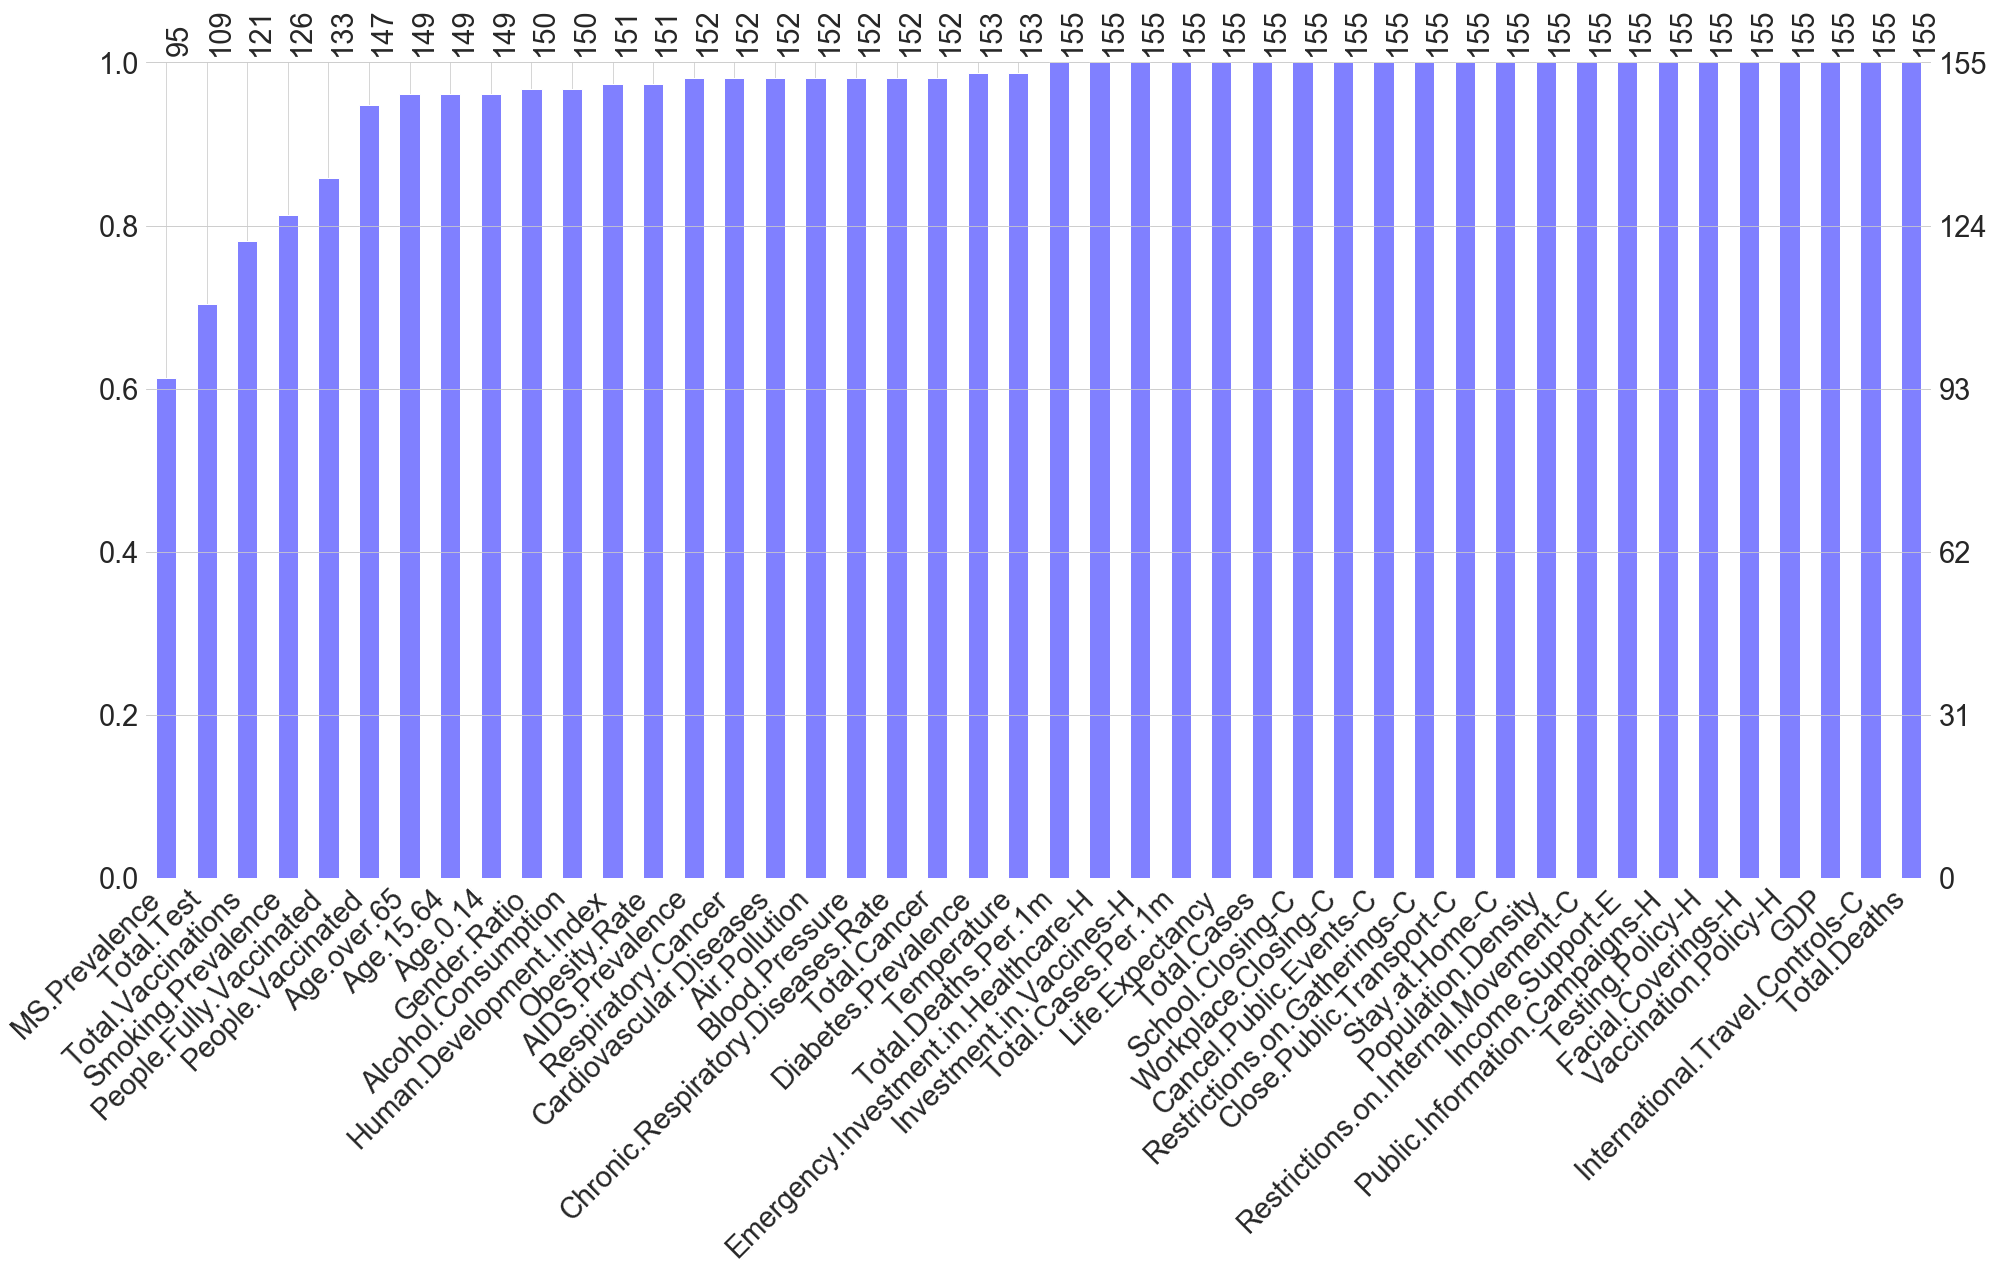

In [15]:
msno.bar(NIdf1.drop(columns = {'Country'}),\
            figsize = (32,15), color = (0.5, 0.5, 1), fontsize = 29, labels = True, sort = 'ascending')
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.savefig('missingbar.png', bbox_inches = 'tight')

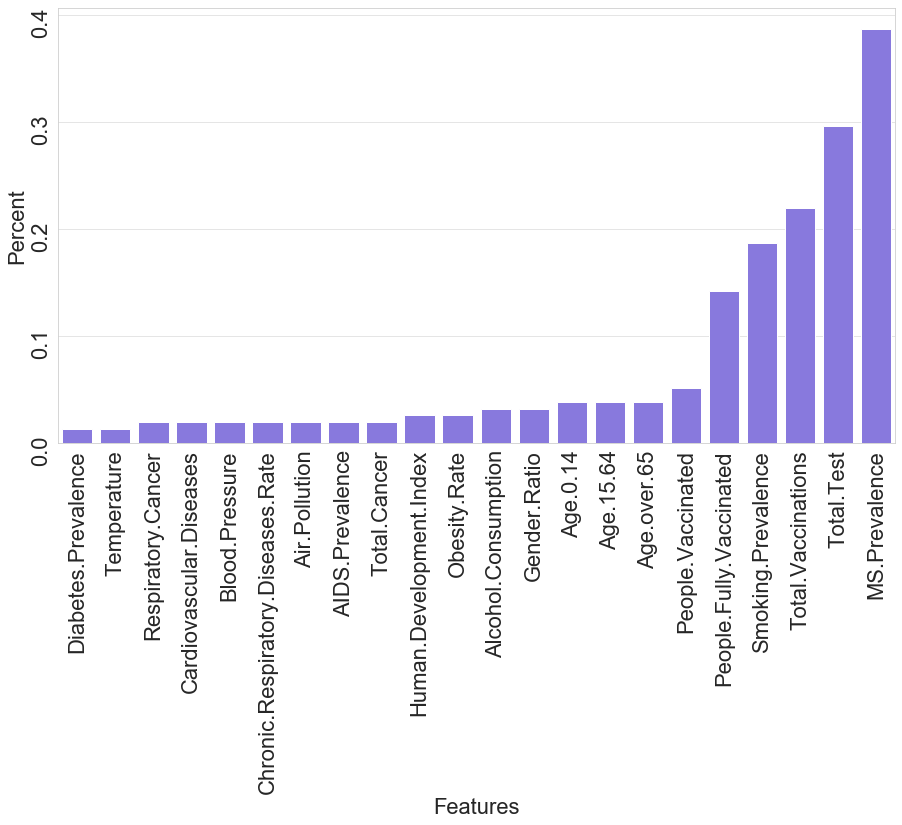

In [18]:
fig, ax = plt.subplots(figsize = (15, 8))
plt.grid(linewidth = .5)

sns.barplot(x = 'Features', y = "Percent", data = missV[missV.Percent != 0], 
            order = missV[missV.Percent != 0].sort_values('Percent').Features, color = '#7C68EE')
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
sns.set_context("poster", font_scale = 1.20, rc = {"grid.linewidth": 2})
plt.savefig('missingbar.png', bbox_inches = 'tight')

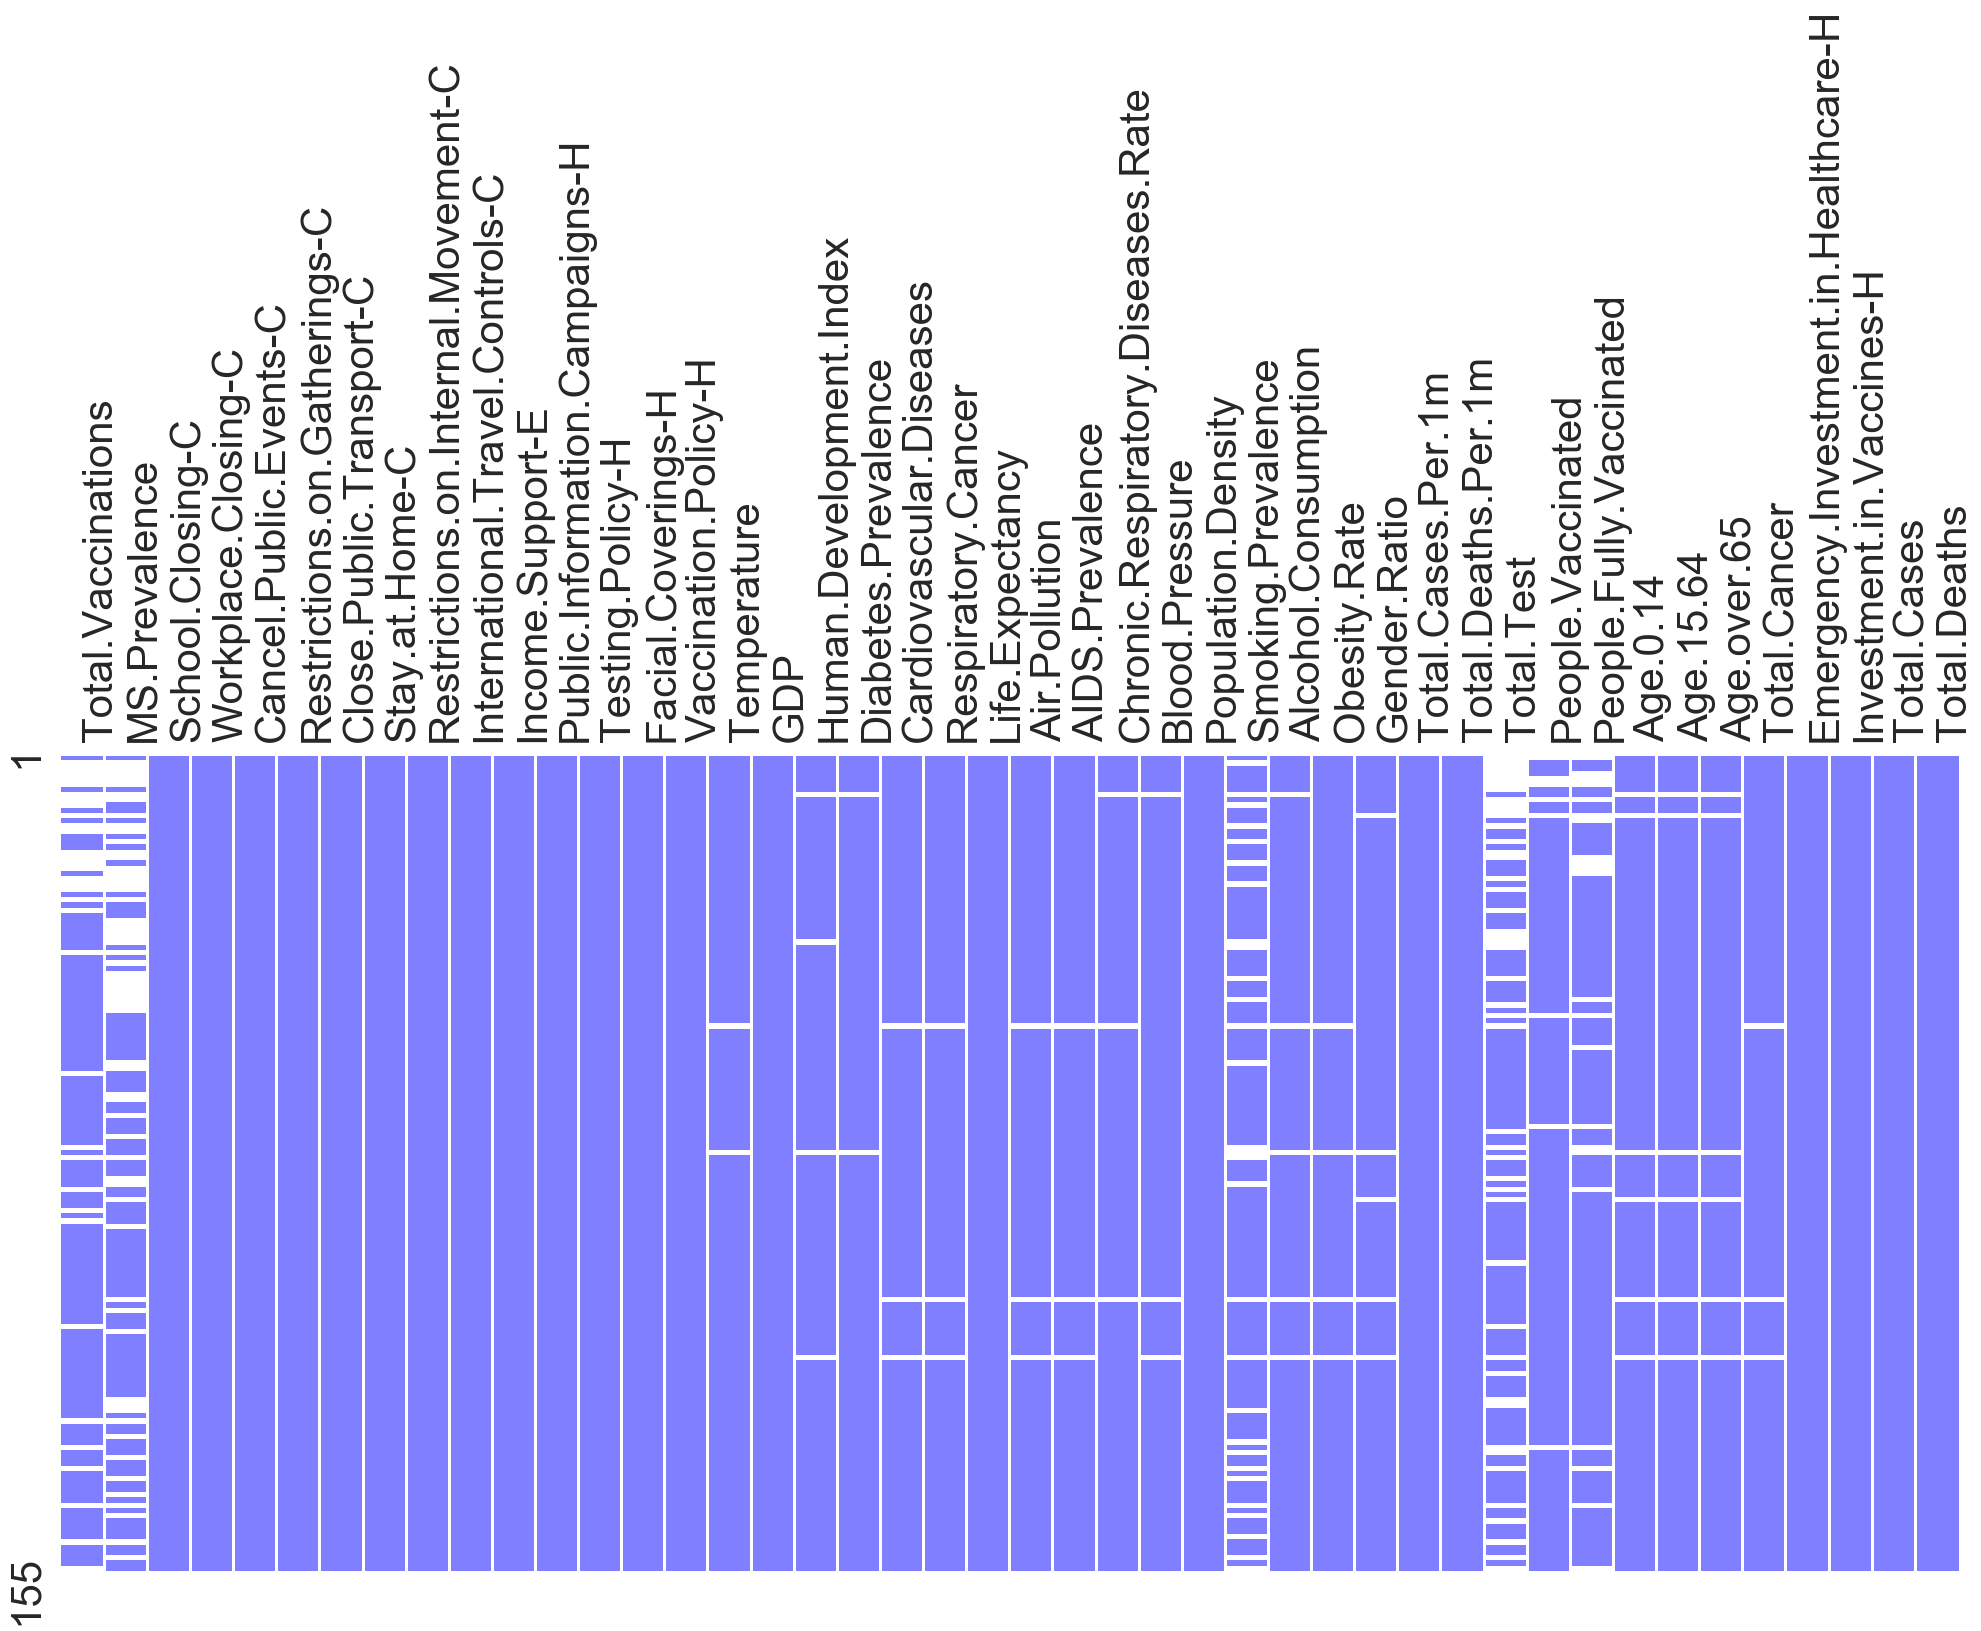

In [19]:
mm = msno.matrix(NIdf1.drop(columns = {'Country'}), width_ratios = (10, 1),\
            figsize = (34, 15), color = (0.5, 0.5, 1), fontsize = 69, sparkline = False, labels = True)
mm.tick_params(axis = 'y', labelsize = 42, rotation = 90)
mm.tick_params(axis = 'x', labelsize = 42, rotation = 90)

plt.yticks(rotation = 90)
plt.savefig('missingMatrix.png', bbox_inches = 'tight')

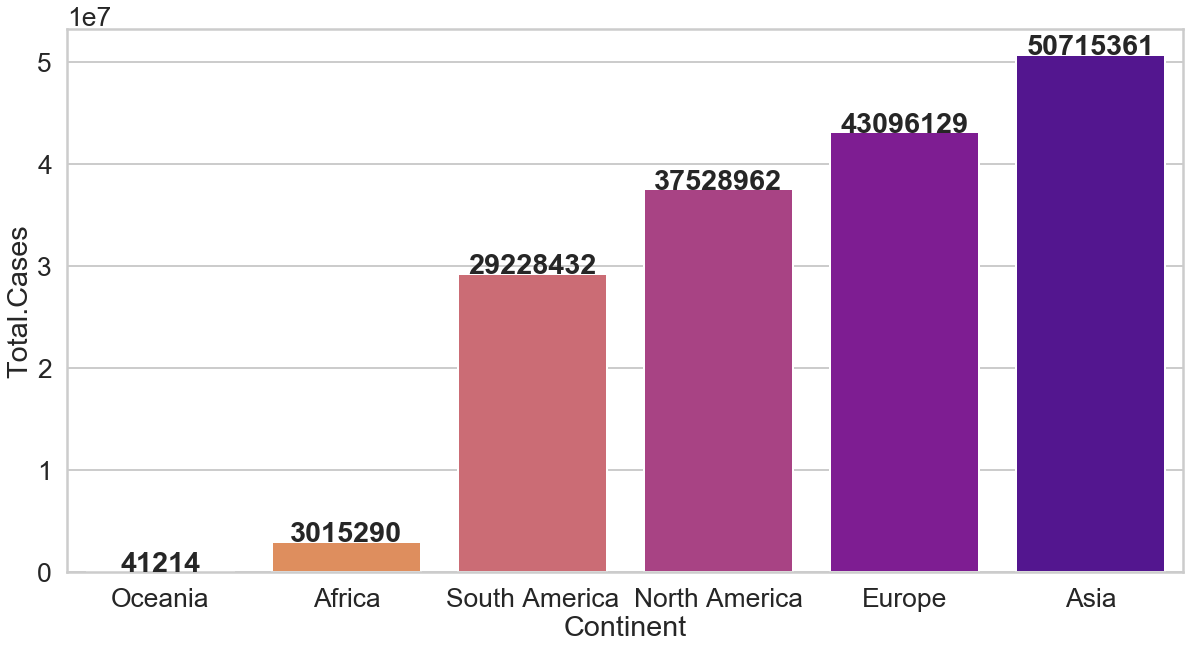

In [20]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(x = 'Continent',
            y = "Total.Cases", data = df_ctnt, palette = 'plasma_r',
            order = df_ctnt.sort_values('Total.Cases').Continent)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height(), "%.0f"% rect.get_height(), weight = 'bold', ha = 'center')

plt.savefig('Total-Cases_bar.png', bbox_inches = 'tight')
plt.show()

In [21]:
df_ctnt['Percent-cp'] = df_ctnt['Total.Cases.Per.1m']/sum(df_ctnt['Total.Cases.Per.1m'])*100
df_ctnt['Percent-dp'] = df_ctnt['Total.Deaths.Per.1m']/sum(df_ctnt['Total.Deaths.Per.1m'])*100
df_ctnt['Percent-i'] = df_ctnt['IFR']/sum(df_ctnt['IFR'])*100
df_ctnt['Percent-c'] = df_ctnt['Total.Cases']/sum(df_ctnt['Total.Cases'])*100
df_ctnt['Percent-d'] = df_ctnt['Total.Deaths']/sum(df_ctnt['Total.Deaths'])*100

In [22]:
df_ctnt

Continent  Latitude  Longitude  Total.Vaccinations  MS.Prevalence  \
0         Africa    197.30     717.81        1.685962e+07          154.0   
1           Asia   1068.42    3168.78        1.012445e+09          771.0   
2         Europe   1912.01     621.31        3.191995e+08         4759.0   
3  North America    336.22   -1403.91        3.471317e+08          589.0   
4        Oceania    -89.06     632.04        5.482743e+06          176.0   
5  South America   -151.84    -773.94        1.094914e+08          127.0   

   School.Closing-C  Workplace.Closing-C  Cancel.Public.Events-C  \
0                66                   50                      65   
1                87                   65                      68   
2                55                   72                      69   
3                41                   28                      27   
4                 3                    5                       5   
5                32                   25                      24   

   Restrictions.on.Gatherings-C  Close.Public.Transport-C  Stay.at.Home-C  \
0                           117                        19              35   
1                           124                        28              53   
2                           149                        13              44   
3                            57                        11              24   
4                             9                         2               4   
5                            47                        13              23   

   Restrictions.on.Internal.Movement-C  International.Travel.Controls-C  \
0                                   38                               94   
1                                   49                              115   
2                                   24                              103   
3                                   20                               39   
4                                    2                               13   
5                                   18                               39   

   Income.Support-E  Public.Information.Campaigns-H  Testing.Policy-H  \
0                21                              83                70   
1                43                              79                90   
2                63                              75                93   
3                15                              33                27   
4                 3                               8                 9   
5                10                              24                26   

   Facial.Coverings-H  Vaccination.Policy-H  Temperature           GDP  \
0                 123                     0      1004.60  1.887801e+12   
1                 120                     0       723.90  3.277904e+13   
2                 107                     2       335.10  2.125453e+13   
3                  49                     2       372.20  2.494462e+13   
4                  11                     0        81.85  1.637325e+12   
5                  35                     0       253.85  3.432918e+12   

   Human.Development.Index  Diabetes.Prevalence  Cardiovascular.Diseases  \
0                    22.53                237.0                 11962.77   
1                    29.91                380.7                 11607.57   
2                    33.61                246.2                  8209.51   
3                    12.81                172.7                  3282.35   
4                     3.17                 44.4                  1210.90   
5                     9.16                 99.2                  2247.88   

   Respiratory.Cancer  Life.Expectancy  Air.Pollution  AIDS.Prevalence  \
0                0.46          2726.44         323.21           153.70   
1                0.92          3069.91         342.98             5.13   
2                1.98          3115.93         185.03            10.09   
3                0.35          1285.09         100.29            12.48 

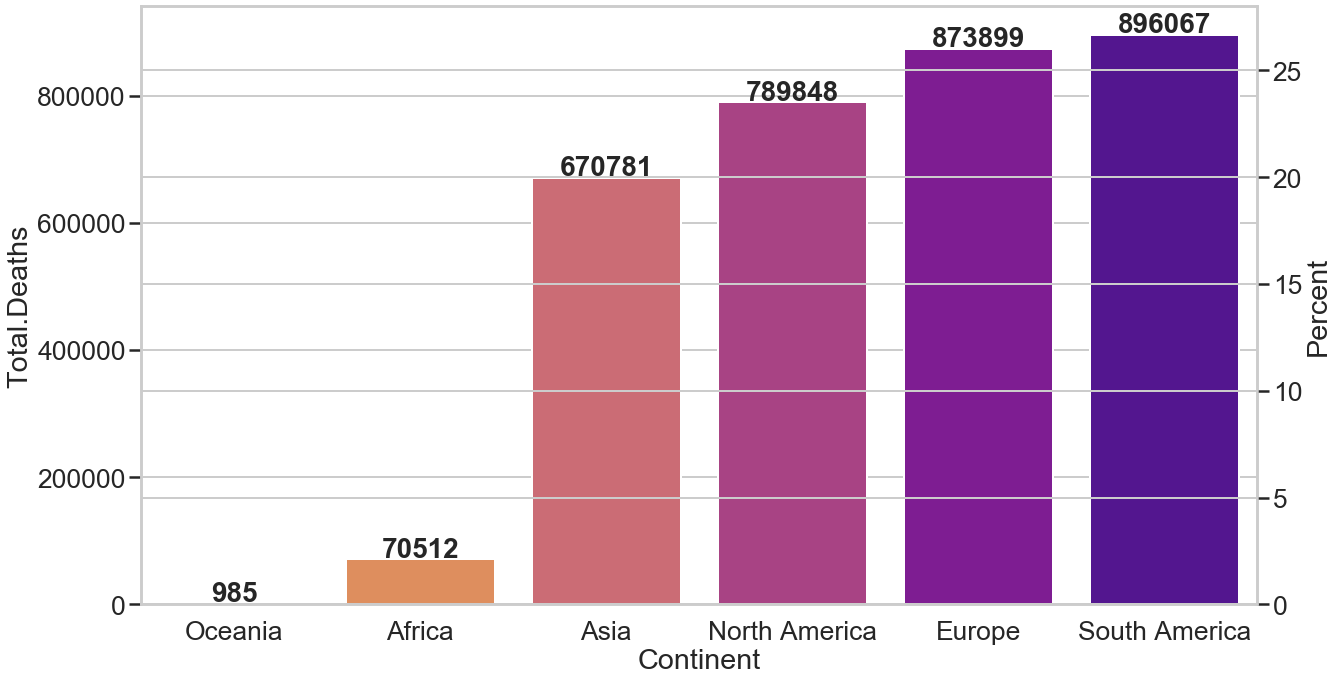

In [23]:
fig, ax = plt.subplots(figsize = (20, 11))
plt.rcParams.update({'font.size': 28})

sns.barplot(x = 'Continent',
            y = "Total.Deaths", data = df_ctnt, palette = 'plasma_r', 
            order = df_ctnt.sort_values('Total.Deaths').Continent)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, 4000+rect.get_height(), "%.0f"% rect.get_height(), weight = 'bold', ha = 'center')
    
ax1 = ax.twinx()
ax1.set_ylabel('Percent')
# set limit 
ax1.set_ylim(0, 28)

plt.savefig('Total-Deaths_bar.png', bbox_inches = 'tight')
plt.show()

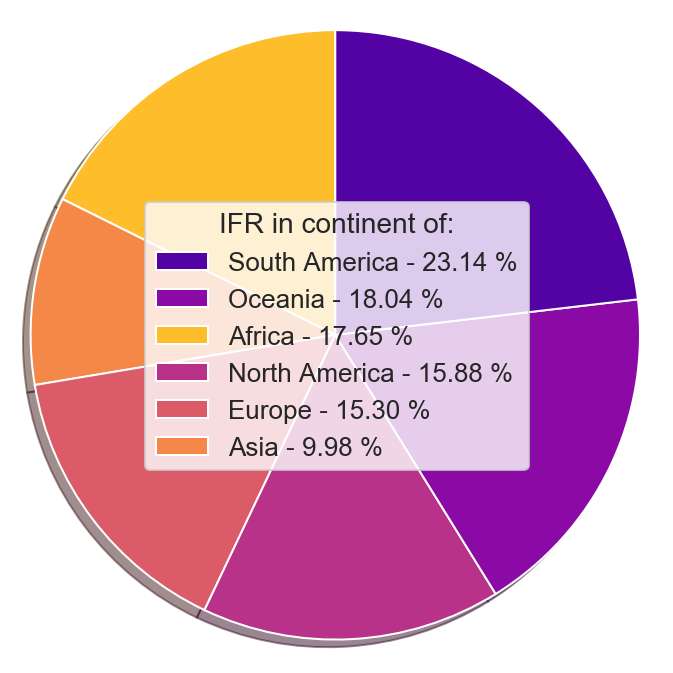

In [24]:
# add colors
colors =  sns.color_palette("plasma_r", 6)
slices =  df_ctnt['IFR']
labels = df_ctnt['Continent']
percent = 100.*slices/slices.sum()

fig = plt.figure(figsize = [10, 10])
ax = fig.add_subplot(111)

patches, texts = ax.pie(slices, colors = colors, startangle = 90, radius = 0.8, shadow = True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, slices),
                                          key=lambda x: x[2],
                                          reverse=True))

ax.legend(patches, labels, loc = 'center', title = "IFR in continent of:", fontsize = 26)
plt.axis('equal')
plt.tight_layout()
plt.savefig('IFR_pie.png', bbox_inches = 'tight')
plt.show()

In [26]:
fig = px.choropleth(NIdf, locations = "Iso_alpha",
                    color = "IFR", 
                    hover_name = "Country", 
                    color_continuous_scale = 'sunset')
fig.update_geos(fitbounds = "locations", visible = False)
fig.update_layout(margin = {"r":0, "t":0, "l":0, "b":0}, showlegend = False, font = dict(size = 15))
fig.show()

In [27]:
# imputated data
df = pd.read_csv('imputed_data.csv')
print(df.shape)
# perform a robust scaler transform
names = df.iloc[:,18:50].columns.tolist()
trans = RobustScaler()
dataN = pd.DataFrame(trans.fit_transform(df.iloc[:,18:50]), columns = names)

dfC = df.iloc[:,5:18].astype(object)
# create dymmy variables
data_dumC = pd.get_dummies(dfC)
print(data_dumC.shape)
data_dumC

data = pd.concat([df.iloc[:,:5], data_dumC, dataN], axis = 1)
#data.to_csv("f_data.csv", index = False)

(155, 50)
(155, 45)


In [28]:
final1 = pd.read_csv('f_data.csv')
final = final1.drop(columns = ["Total.Cases", "Total.Deaths.Per.1m", 'Total.Deaths', 'Total.Cases','IFR'])

# transform training data
df['IFR_normalized'], fitted_lambda = stats.boxcox(df['IFR'])

final = pd.concat([final.iloc[:,:77], df[['IFR_normalized','IFR']], final.iloc[:,77:]], axis = 1)
final
final.iloc[:,50:].columns.values
#final.to_csv("data.csv", index = False)

array(['Temperature', 'GDP', 'Human.Development.Index',
       'Diabetes.Prevalence', 'Cardiovascular.Diseases',
       'Respiratory.Cancer', 'Life.Expectancy', 'Air.Pollution',
       'AIDS.Prevalence', 'Chronic.Respiratory.Diseases.Rate',
       'Blood.Pressure', 'Population.Density', 'Smoking.Prevalence',
       'Alcohol.Consumption', 'Obesity.Rate', 'Gender.Ratio',
       'Total.Cases.Per.1m', 'Total.Test', 'People.Vaccinated',
       'People.Fully.Vaccinated', 'Age.0.14', 'Age.15.64', 'Age.over.65',
       'Total.Cancer', 'Emergency.Investment.in.Healthcare-H',
       'Investment.in.Vaccines-H', 'Total.Vaccinations', 'IFR_normalized',
       'IFR', 'MS.Prevalence'], dtype=object)

#### Boxplot:

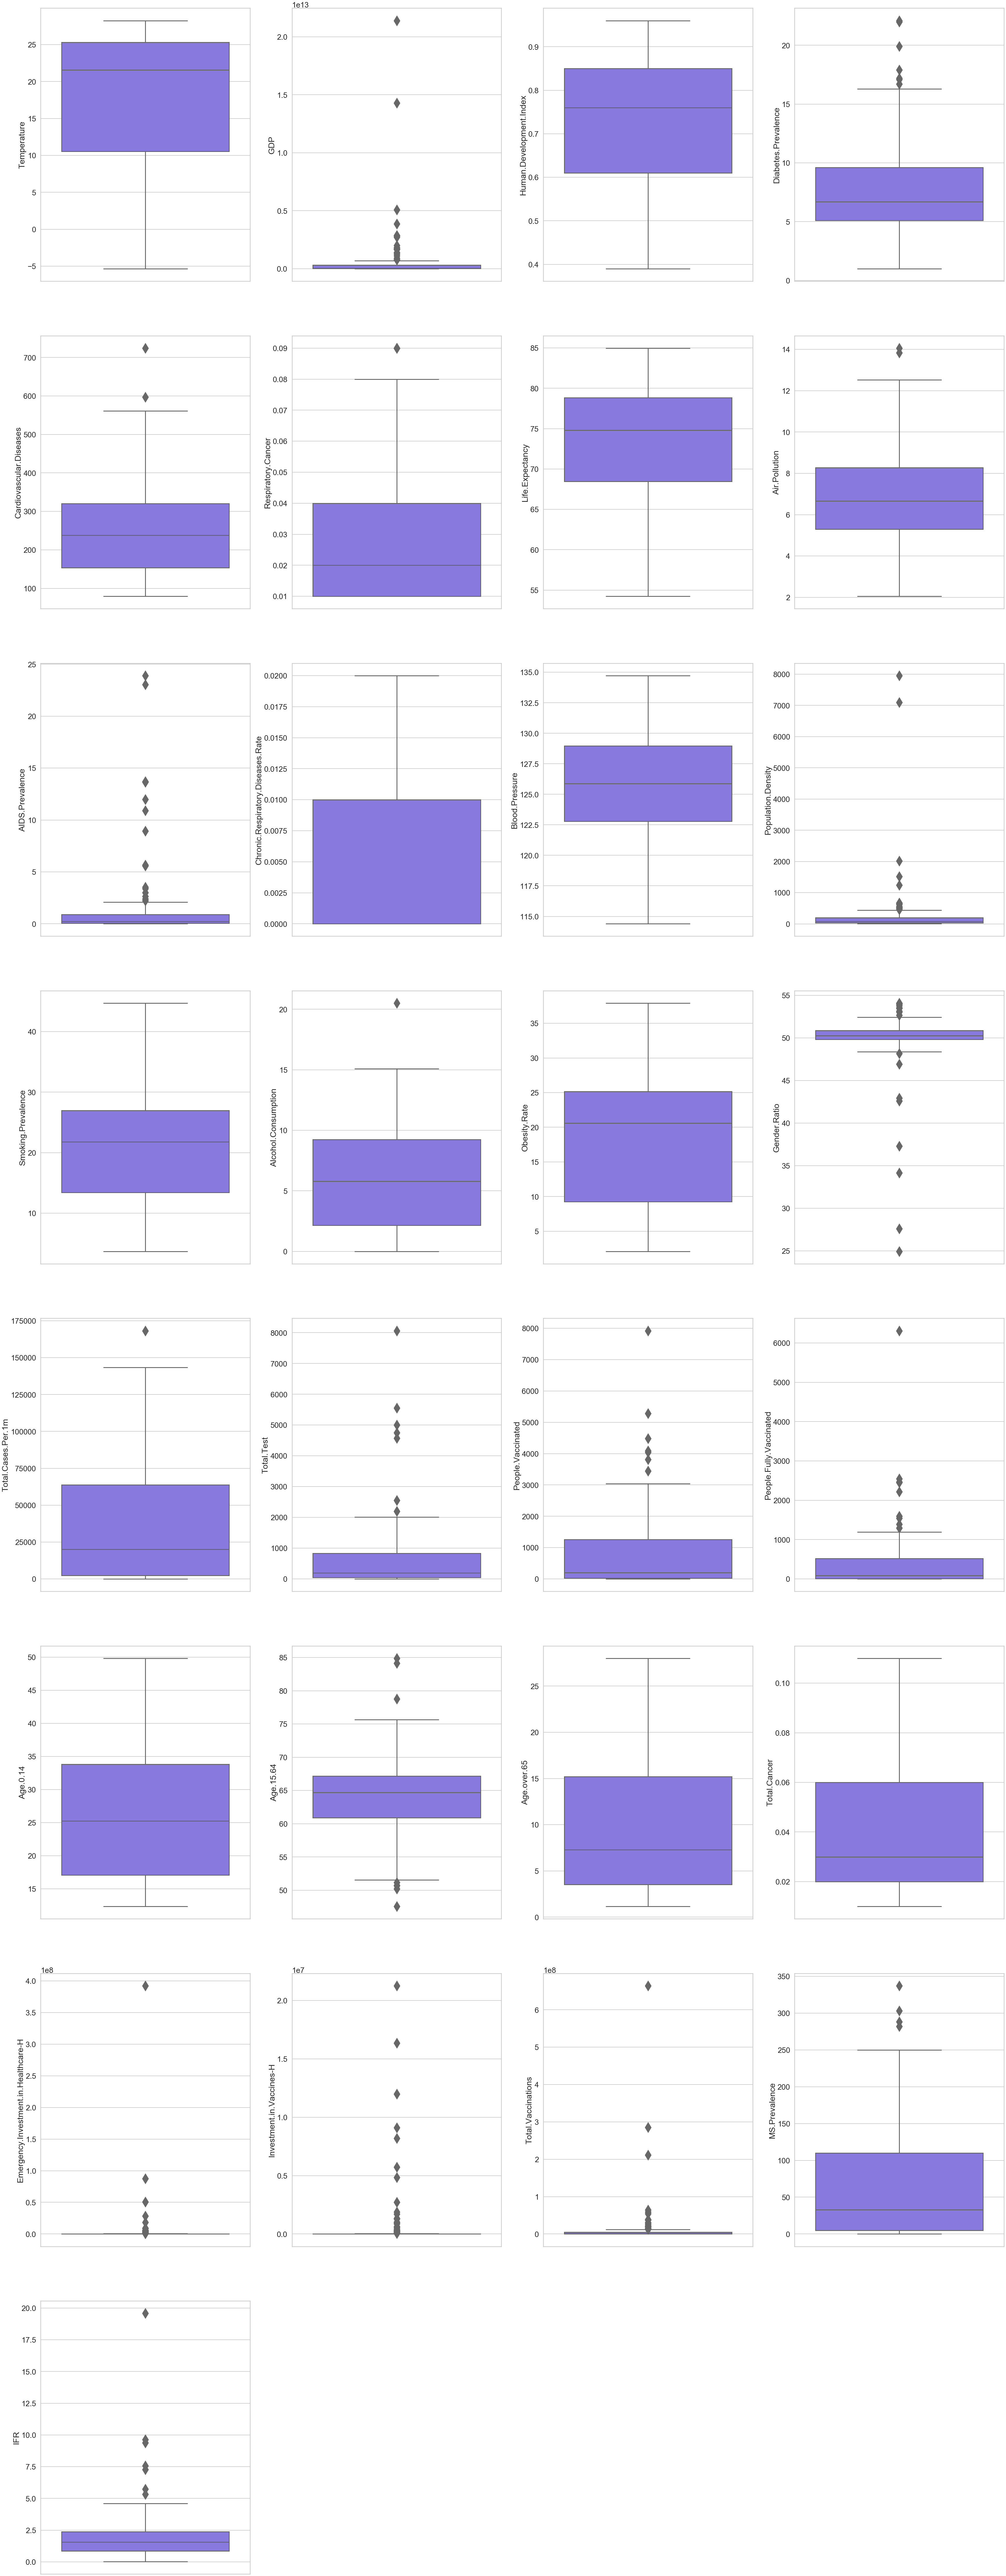

In [32]:
data = NIdf.iloc[:,20:47]
data1 = pd.concat([data.drop(columns = ['Total.Deaths.Per.1m']), 
              NIdf[['Total.Vaccinations','MS.Prevalence', 'IFR']]], axis = 1)

l = data1.columns.values
number_of_columns = 4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize = (15*number_of_columns, 21*number_of_rows))
names = data1.columns.tolist()

for i in range(0,len(l)):
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    plt.rcParams["font.size"] = "77"
    sns.set_style('whitegrid')
    sns.boxplot(data1[l[i]], color = '#7B68EE', orient = 'v', fliersize = 26)
    plt.savefig('boxplot.png', bbox_inches = 'tight')

#### Density

In [35]:
l = final.iloc[:,50:].columns.values
number_of_columns = 4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize = (23*number_of_columns, 25*number_of_rows))

for i in range(0, len(l)):
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    sns.set_style('whitegrid')
    plt.rcParams["font.size"] = "220"
    sns.distplot(final[l[i]], color = '#7B68EE', kde_kws = {'linewidth': 10})
    plt.savefig('normal-hist-robust.png', bbox_inches = 'tight')